# Mini Project 02
Bitewise Fellowship

Submitted By: Awais Anwer

## 1. Data
For this mini project, i am going to use "Blue Book for Bulldozers" dataset available on kaggle.

The reason to use this dataset is that it is little bit difficult (as mentioned in the requirement of the mini project) and it requires some preprocessing before feeding it to the machine learning model.

There are 3 datasets:


1.   Train.csv - Historical bulldozer sales examples up to 2011 (close to 400,000 examples with 50+ different attributes, including SalePrice which is the target variable).
2.   Valid.csv - Historical bulldozer sales examples from January 1 2012 to April 30 2012 (close to 12,000 examples with the same attributes as Train.csv).
3.   Test.csv - Historical bulldozer sales examples from May 1 2012 to November 2012 (close to 12,000 examples but missing the SalePrice attribute, as this is what we'll be trying to predict).


link to the dataset:
[Blue book for bulldozers](https://www.kaggle.com/c/bluebook-for-bulldozers/data)


In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_log_error, mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Conv1D, Flatten, Dropout, BatchNormalization, LeakyReLU
from tensorflow.keras.optimizers import Adam

import warnings
warnings.filterwarnings("ignore")

In [13]:
df = pd.read_csv("/content/drive/MyDrive/DataScience/bluebook-for-bulldozers/TrainAndValid.csv",
                 low_memory=False,
                 parse_dates=["saledate"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [14]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


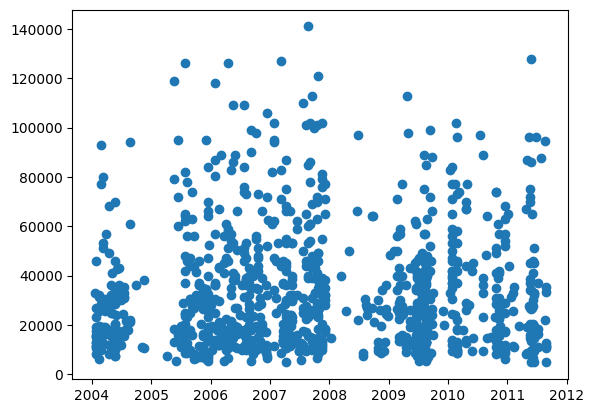

In [16]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);

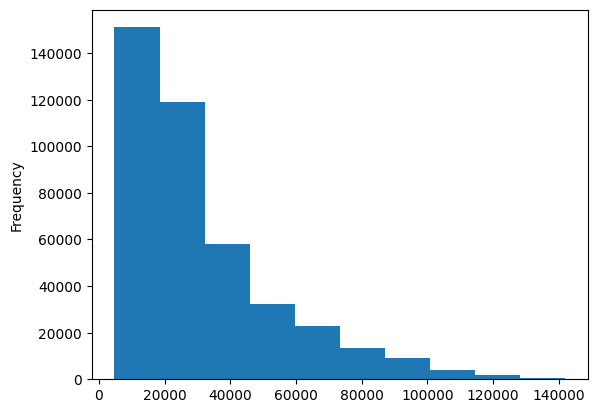

In [17]:
df.SalePrice.plot.hist();

In [18]:
# sorting the DataFrame in ascending order
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(15)

,saledate
205615,1989-01-17
274835,1989-01-31
141296,1989-01-31
212552,1989-01-31
62755,1989-01-31
54653,1989-01-31
81383,1989-01-31
204924,1989-01-31
135376,1989-01-31
113390,1989-01-31


In [19]:
df_tmp = df.copy()

In [20]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear

# drop original saledate
df_tmp.drop("saledate", axis = 1, inplace = True)

In [21]:
df_tmp.tail().T

,410879,412476,411927,407124,409203
SalesID,6302984,6324811,6313029,6266251,6283635
SalePrice,16000.0,6000.0,16000.0,55000.0,34000.0
MachineID,1915521,1919104,1918416,509560,1869284
ModelID,5266,19330,17244,3357,4701
datasource,149,149,149,149,149
auctioneerID,99.0,99.0,99.0,99.0,99.0
YearMade,2001,2004,2004,1993,1000
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,D38E,2064,337G,12G,544H


In [22]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   fiModelDesc               412698 non-null  object 
 10  fiBaseModel               412698 non-null  object 
 11  fiSecondaryDesc           271971 non-null  object 
 12  fiModelSeries             58667 non-null   object 
 13  fiModelDescriptor         74816 non-null   o

In [23]:
# check for missing values
df_tmp.isna().sum()

,0
SalesID,0
SalePrice,0
MachineID,0
ModelID,0
datasource,0
auctioneerID,20136
YearMade,0
MachineHoursCurrentMeter,265194
UsageBand,339028
fiModelDesc,0


In [24]:
# Separate numerical and categorical columns
num_cols = df_tmp.select_dtypes(include=['float64', 'int64']).columns
obj_cols = df_tmp.select_dtypes(include=['object']).columns

In [25]:
num_cols

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter'],
      dtype='object')

In [26]:
obj_cols

Index(['UsageBand', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [27]:
# Convert them to category
for col in obj_cols:
    df_tmp[col] = df_tmp[col].astype('category').cat.as_ordered()

In [28]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [29]:
df_tmp.Blade_Type.cat.categories

Index(['Angle', 'Coal', 'Landfill', 'No', 'None or Unspecified', 'PAT',
       'Semi U', 'Straight', 'U', 'VPAT'],
      dtype='object')

In [30]:
df_tmp.Blade_Type.cat.codes

,0
205615,7
274835,-1
141296,7
212552,-1
62755,5
...,...
410879,5
412476,-1
411927,-1
407124,-1


In [31]:
df_tmp.state.head(10)

,state
205615,Texas
274835,Florida
141296,Florida
212552,Florida
62755,Florida
54653,Florida
81383,Florida
204924,Florida
135376,Florida
113390,Florida


In [32]:
df_tmp.isna().mean().sort_values(ascending=False)

,0
Blade_Width,0.937041
Engine_Horsepower,0.937041
Tip_Control,0.937041
Pushblock,0.937041
Blade_Extension,0.937041
Enclosure_Type,0.937041
Scarifier,0.937014
Hydraulics_Flow,0.891264
Grouser_Tracks,0.891264
Coupler_System,0.891024


In [33]:
# filling missing values in numerical columns with median.
# numerical columns with missing values
for col in num_cols:
    if pd.isna(df_tmp[col]).sum():
      print(col)

auctioneerID
MachineHoursCurrentMeter


In [34]:
for col in num_cols:
  if pd.isna(df_tmp[col]).sum():
    df_tmp[col + "_is_missing"] = pd.isna(df_tmp[col])
    df_tmp[col] = df_tmp[col].fillna(df_tmp[col].median())

In [35]:
# checking whether there is some missing values
for col in num_cols:
    if pd.isna(df_tmp[col]).sum():
      print(col)

In [36]:
# Check to see how many examples were missing
df_tmp.auctioneerID_is_missing.value_counts()

,count
auctioneerID_is_missing,
False,392562
True,20136


In [37]:
# Filling and turning categorical variables to numbers
# Now we've filled the numeric values, we'll do the same with the categorical values at the same time as turning them into numbers.

In [38]:
for col in obj_cols:
    print(col)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [39]:
# Turn categorical variables into numbers
for col in obj_cols:
  # Add binary column to indicate whether the sample had missing value
  df_tmp[col+"_is_missing"] = pd.isna(df_tmp[col])
  # Turn categories into numbers
  df_tmp[col] = pd.Categorical(df_tmp[col]).codes+1

In [40]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int32(5), int64(5), int8(40)
memory usage: 73.2 MB


In [41]:
# save preprocessed dataset
df_tmp.to_csv("/content/drive/MyDrive/DataScience/bluebook-for-bulldozers/train_tmp.csv",
              index=False)

### Splitting data into Train/Validation sets
According to the Kaggle data page, the validation set and test set are split according to dates.

This makes sense since we're working on a time series problem.

E.g. using past events to try and predict future events.

In our case:

1. Training = all samples up until 2011
2. Valid = all samples form January 1, 2012 - April 30, 2012
3. Test = all samples from May 1, 2012 - November 2012

In [42]:
print(df_tmp.saleYear.value_counts())

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64


In [43]:
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_train), len(df_val)

(401125, 11573)

In [44]:
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

### Evaluation function

In [45]:
def rmsle(y_test, y_preds):
  return np.sqrt(mean_squared_log_error(y_test, y_preds))

# function to evaluate our model
def show_scores(model):
  train_preds = model.predict(X_train)
  val_preds = model.predict(X_valid)

  scores = {
      "Training MAE": mean_absolute_error(y_train, train_preds),
      "Valid MAE": mean_absolute_error(y_valid, val_preds),
      "Training RMSLE": rmsle(y_train, train_preds),
      "Valid RMSLE": rmsle(y_valid, val_preds),
      "Training R^2": model.score(X_train, y_train),
      "Valid R^2": model.score(X_valid, y_valid)
  }
  return scores

### Baseling model

In [46]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs=-1, max_samples=10000)

In [47]:
model.fit(X_train, y_train)

RandomForestRegressor(max_samples=10000, n_jobs=-1)

In [48]:
show_scores(model)

{'Training MAE': 5553.975492203178,
 'Valid MAE': 7129.494105244967,
 'Training RMSLE': 0.2572588434543666,
 'Valid RMSLE': 0.2922034931534064,
 'Training R^2': 0.8610363356321534,
 'Valid R^2': 0.8345094975733693}

### Hyperparameter tuning of RandomForestRegressor with RandomizedSearchCV

In [49]:
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, "auto", "sqrt"],
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions = rf_grid,
                              n_iter = 20,
                              cv = 5,
                              verbose=True)
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 'auto', 'sqrt'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [50]:
rs_model.best_params_

{'n_estimators': 20,
 'min_samples_split': 14,
 'min_samples_leaf': 5,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [51]:
show_scores(rs_model)

{'Training MAE': 6197.571975605716,
 'Valid MAE': 7458.630304864183,
 'Training RMSLE': 0.2800074889009001,
 'Valid RMSLE': 0.302496237456249,
 'Training R^2': 0.8288442134693647,
 'Valid R^2': 0.8170182498969891}

In [52]:
rs_model.best_estimator_.feature_importances_

array([2.25938355e-02, 2.59895028e-02, 4.40363000e-02, 1.47369238e-03,
       2.99779762e-03, 2.04202748e-01, 2.48804183e-03, 1.37409320e-03,
       4.17224856e-02, 3.29021821e-02, 6.98305973e-02, 3.17329594e-03,
       2.73005647e-02, 1.53269381e-01, 3.28894692e-02, 5.29005304e-03,
       1.32922436e-03, 5.12997018e-03, 4.19070253e-03, 4.62634094e-02,
       2.65141819e-03, 8.25188538e-04, 1.48281340e-03, 2.10316526e-04,
       1.82514052e-03, 7.93667618e-06, 9.68292390e-04, 1.42389342e-02,
       3.48635643e-04, 4.44822291e-05, 4.75910293e-03, 1.40657678e-03,
       2.56902105e-03, 3.23881556e-04, 6.87554308e-03, 1.84292025e-02,
       1.04455918e-03, 1.84124437e-02, 1.36955575e-04, 3.56968504e-03,
       1.41866351e-03, 9.64953027e-04, 1.52025908e-03, 5.54459444e-04,
       7.91701392e-04, 5.73084429e-04, 8.57987723e-04, 4.25774898e-03,
       9.26059152e-04, 1.56290835e-04, 1.13832937e-03, 5.66141760e-02,
       3.58628029e-03, 5.79764268e-03, 2.64954669e-03, 8.01743170e-03,
      

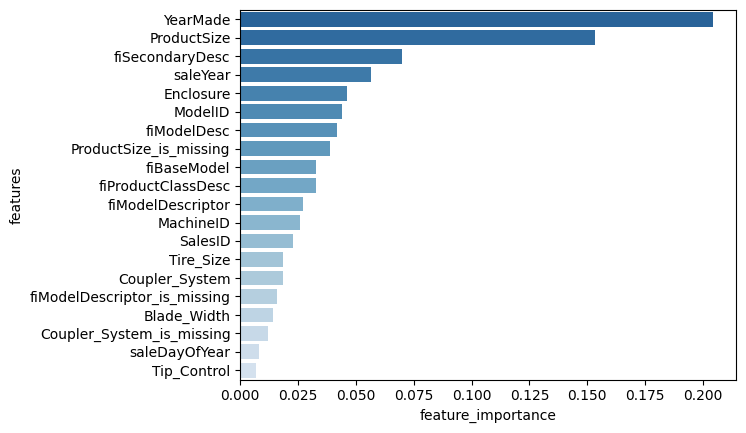

In [53]:
def plot_features(columns, importances, n=20):
    # Create a DataFrame and sort by importance
    df = (pd.DataFrame({"features": columns,
                        "feature_importance": importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop=True))

    # Generate a color palette from a colormap
    cmap = plt.get_cmap("Blues")
    colors = [cmap(x) for x in np.linspace(0.8, 0.2, n)]

    # Plot with custom colors
    sns.barplot(x="feature_importance",
                y="features",
                data=df[:n],
                orient="h",
                palette=colors)

    plt.show()

plot_features(X_train.columns, rs_model.best_estimator_.feature_importances_)

### ANN model

In [75]:
# Build the ANN model
ann = Sequential()

# Input Layer
ann.add(Input(shape=(X_train.shape[1],)))

# Layer 1
ann.add(Dense(128))
ann.add(BatchNormalization())
ann.add(LeakyReLU(alpha=0.1))

# Layer 2
ann.add(Dense(256))
ann.add(BatchNormalization())
ann.add(LeakyReLU(alpha=0.1))
ann.add(Dropout(0.5))

# Layer 3
ann.add(Dense(256))
ann.add(BatchNormalization())
ann.add(LeakyReLU(alpha=0.1))
ann.add(Dropout(0.5))

# Layer 4
ann.add(Dense(128))
ann.add(BatchNormalization())
ann.add(LeakyReLU(alpha=0.1))
ann.add(Dropout(0.3))

# Layer 5
ann.add(Dense(64))
ann.add(BatchNormalization())
ann.add(LeakyReLU(alpha=0.1))
ann.add(Dropout(0.3))

# Output Layer
ann.add(Dense(1))

# Compile the model with a learning rate scheduler
optimizer = Adam(learning_rate=0.001)
ann.compile(optimizer=optimizer, loss='mean_absolute_error')

ann.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_38 (Dense)                     │ (None, 128)                 │          13,184 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_5 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_6 (LeakyReLU)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_40 (Dense)                     │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_7 (LeakyReLU)            │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_11 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_41 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_8 (LeakyReLU)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_12 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_9 (LeakyReLU)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 64)                  │              

 Total params: 156,545 (611.50 KB)

 Trainable params: 154,881 (605.00 KB)

 Non-trainable params: 1,664 (6.50 KB)

In [76]:
# standardize the data
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Transform the validation data
X_val_scaled = scaler.transform(X_valid)

In [77]:
# Train the model
history = ann.fit(X_train_scaled, y_train, epochs=50, batch_size=512, validation_data=(X_val_scaled, y_valid))

Epoch 1/50
784/784 ━━━━━━━━━━━━━━━━━━━━ 14s 10ms/step - loss: 31118.9336 - val_loss: 35117.5273
Epoch 2/50
784/784 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 30971.8086 - val_loss: 34819.6172
Epoch 3/50
784/784 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 30597.7930 - val_loss: 34361.4258
Epoch 4/50
784/784 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 30054.3457 - val_loss: 33761.2070
Epoch 5/50
784/784 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 29419.1172 - val_loss: 33058.6914
Epoch 6/50
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 28681.6641 - val_loss: 32254.0859
Epoch 7/50
784/784 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 27866.3555 - val_loss: 30970.0957
Epoch 8/50
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 26866.1445 - val_loss: 30022.5195
Epoch 9/50
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 25913.6504 - val_loss: 28878.5977
Epoch 10/50
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 24736.5664 - val_loss: 27739.3594
Epoch 11/50
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - lo

In [96]:
# save the model
ann.save("/content/drive/MyDrive/DataScience/bluebook-for-bulldozers/ann_model.keras")

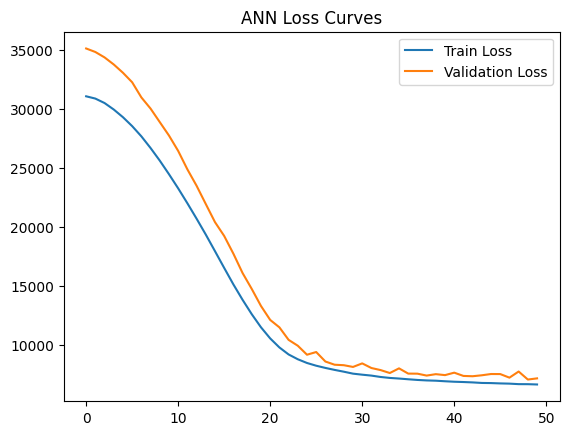

In [79]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('ANN Loss Curves')
plt.show()

### CNN

In [82]:
# Reshape data for 1D CNN
X_train_cnn = np.expand_dims(X_train, axis=2).astype('float32')
X_val_cnn = np.expand_dims(X_valid, axis=2).astype('float32')

# Convert target variables to float32
y_train_cnn = y_train.astype('float32')
y_valid_cnn = y_valid.astype('float32')

In [84]:
X_train_cnn.shape, X_val_cnn.shape, y_train_cnn.shape, y_valid.shape

((401125, 102, 1), (11573, 102, 1), (401125,), (11573,))

In [87]:
# Build the Conv1D + ANN model
cnn_model = Sequential()
cnn_model.add(Input(shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(Conv1D(64, kernel_size=3, activation='relu'))
cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dense(1))

cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_absolute_error')
cnn_model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_3 (Conv1D)                    │ (None, 100, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 6400)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_50 (Dense)                     │ (None, 64)                  │         409,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_51 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 409,985 (1.56 MB)

 Trainable params: 409,985 (1.56 MB)

 Non-trainable params: 0 (0.00 B)

In [88]:
# Train
history_cnn = cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=512, validation_data=(X_val_cnn, y_valid))

Epoch 1/50
784/784 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 17169.9355 - val_loss: 17979.8047
Epoch 2/50
784/784 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 14602.3613 - val_loss: 17358.1680
Epoch 3/50
784/784 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 13875.4814 - val_loss: 16855.2188
Epoch 4/50
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 13385.0312 - val_loss: 15561.8203
Epoch 5/50
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 12965.0625 - val_loss: 15926.3711
Epoch 6/50
784/784 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 12760.4824 - val_loss: 15004.2490
Epoch 7/50
784/784 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 12604.0723 - val_loss: 14922.9717
Epoch 8/50
784/784 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 12511.1738 - val_loss: 14807.4287
Epoch 9/50
784/784 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 12421.6240 - val_loss: 14620.5342
Epoch 10/50
784/784 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 12282.4561 - val_loss: 14644.9883
Epoch 11/50
784/784 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss

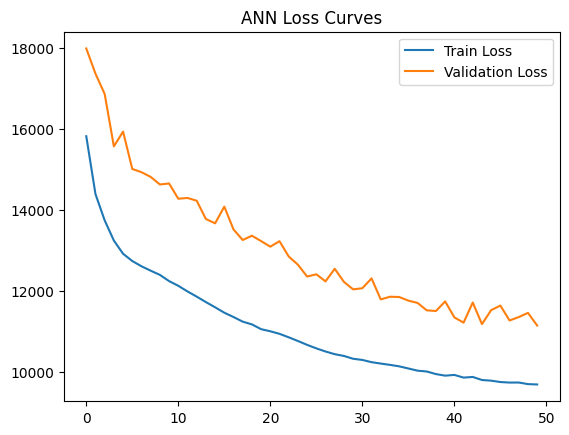

In [92]:
# Plot the training and validation loss
plt.plot(history_cnn.history['loss'], label='Train Loss')
plt.plot(history_cnn.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('ANN Loss Curves')
plt.show()

In [90]:
# improving the cnn model
from tensorflow.keras.layers import MaxPooling1D

cnn_model = Sequential()
cnn_model.add(Input(shape=(X_train_cnn.shape[1], 1)))

# more convolutional layers and pooling layers
cnn_model.add(Conv1D(64, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Conv1D(128, kernel_size=3, activation='relu'))
cnn_model.add(MaxPooling1D(pool_size=2))

# Dense layers with dropout
cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation='relu', kernel_regularizer='l2'))
cnn_model.add(Dropout(0.5))
cnn_model.add(Dense(64, activation='relu', kernel_regularizer='l2'))
cnn_model.add(Dropout(0.3))
cnn_model.add(Dense(1))

# Compile the model with a learning rate scheduler
optimizer = Adam(learning_rate=0.001)
cnn_model.compile(optimizer=optimizer, loss='mean_absolute_error')
cnn_model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_4 (Conv1D)                    │ (None, 100, 64)             │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 50, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_5 (Conv1D)                    │ (None, 48, 128)             │          24,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 24, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 3072)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_52 (Dense)                     │ (None, 128)                 │         393,344 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_53 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_54 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 426,625 (1.63 MB)

 Trainable params: 426,625 (1.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Plot the training and validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('ANN Loss Curves')
plt.show()

In [93]:
history_cnn_2 = cnn_model.fit(
    X_train_cnn, y_train,
    epochs=50,
    batch_size=512,
    validation_data=(X_val_cnn, y_valid)
)

Epoch 1/50
784/784 ━━━━━━━━━━━━━━━━━━━━ 23s 19ms/step - loss: 17261.7734 - val_loss: 16704.7227
Epoch 2/50
784/784 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - loss: 14104.1699 - val_loss: 14614.4658
Epoch 3/50
784/784 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 13192.0303 - val_loss: 14998.5820
Epoch 4/50
784/784 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 12485.2402 - val_loss: 15495.1514
Epoch 5/50
784/784 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 11863.0791 - val_loss: 12565.0986
Epoch 6/50
784/784 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 11451.0889 - val_loss: 12492.1133
Epoch 7/50
784/784 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 11239.6729 - val_loss: 12140.0732
Epoch 8/50
784/784 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 11092.9727 - val_loss: 13496.7998
Epoch 9/50
784/784 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 10921.3955 - val_loss: 12747.9258
Epoch 10/50
784/784 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 10908.6377 - val_loss: 12510.8184
Epoch 11/50
784/784 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step -

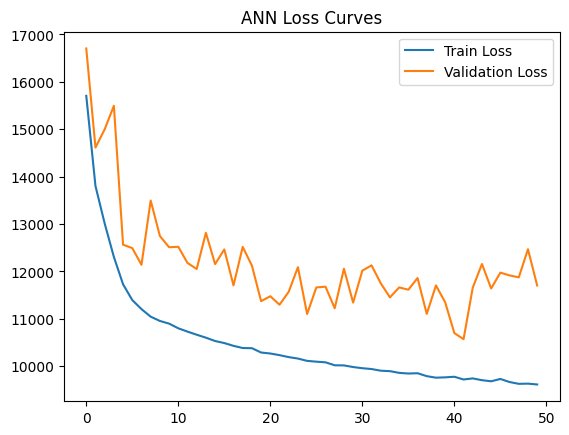

In [94]:
# Plot the training and validation loss
plt.plot(history_cnn_2.history['loss'], label='Train Loss')
plt.plot(history_cnn_2.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('ANN Loss Curves')
plt.show()